In [1]:
!unzip 'drive/MyDrive/Brain MRI Images for Brain Tumor Detection/archive (1).zip' -d 'drive/MyDrive/Brain MRI Images for Brain Tumor Detection/'

Archive:  drive/MyDrive/Brain MRI Images for Brain Tumor Detection/archive (1).zip
replace drive/MyDrive/Brain MRI Images for Brain Tumor Detection/brain_tumor_dataset/no/1 no.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: drive/MyDrive/Brain MRI Images for Brain Tumor Detection/brain_tumor_dataset/no/1 no.jpeg  
  inflating: drive/MyDrive/Brain MRI Images for Brain Tumor Detection/brain_tumor_dataset/no/10 no.jpg  
  inflating: drive/MyDrive/Brain MRI Images for Brain Tumor Detection/brain_tumor_dataset/no/11 no.jpg  
  inflating: drive/MyDrive/Brain MRI Images for Brain Tumor Detection/brain_tumor_dataset/no/12 no.jpg  
  inflating: drive/MyDrive/Brain MRI Images for Brain Tumor Detection/brain_tumor_dataset/no/13 no.jpg  
  inflating: drive/MyDrive/Brain MRI Images for Brain Tumor Detection/brain_tumor_dataset/no/14 no.jpg  
  inflating: drive/MyDrive/Brain MRI Images for Brain Tumor Detection/brain_tumor_dataset/no/15 no.jpg  
  inflating: drive/MyDrive/Brain MRI Images

In [2]:
braintumor = 'drive/MyDrive/Brain MRI Images for Brain Tumor Detection/brain_tumor_dataset'
braintumor

'drive/MyDrive/Brain MRI Images for Brain Tumor Detection/brain_tumor_dataset'

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.preprocessing import image
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout

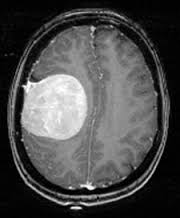

In [4]:
from PIL import Image

# Load the image
image_path = 'drive/MyDrive/Brain MRI Images for Brain Tumor Detection/brain_tumor_dataset/yes/Y1.jpg'
image = Image.open(image_path)

# Show the image
image.show()


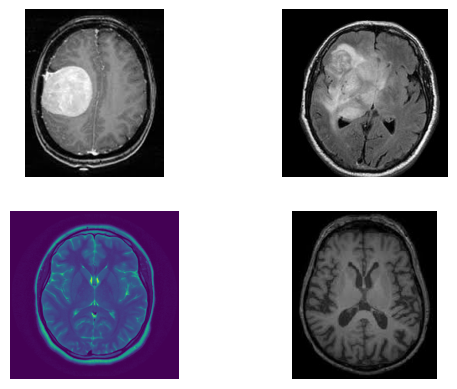

In [5]:
import matplotlib.pyplot as plt

# Load 4 images from the dataset
image_paths = [
    'drive/MyDrive/Brain MRI Images for Brain Tumor Detection/brain_tumor_dataset/yes/Y1.jpg',
    'drive/MyDrive/Brain MRI Images for Brain Tumor Detection/brain_tumor_dataset/yes/Y2.jpg',
    'drive/MyDrive/Brain MRI Images for Brain Tumor Detection/brain_tumor_dataset/no/1 no.jpeg',
    'drive/MyDrive/Brain MRI Images for Brain Tumor Detection/brain_tumor_dataset/no/10 no.jpg'
]

# Display the images in a 2x2 grid
fig, axs = plt.subplots(2, 2)
for i in range(2):
    for j in range(2):
        # Load the image
        image = Image.open(image_paths[i*2+j])
        
        # Display the image in a subplot
        axs[i, j].imshow(image)
        axs[i, j].axis('off')

plt.show()

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

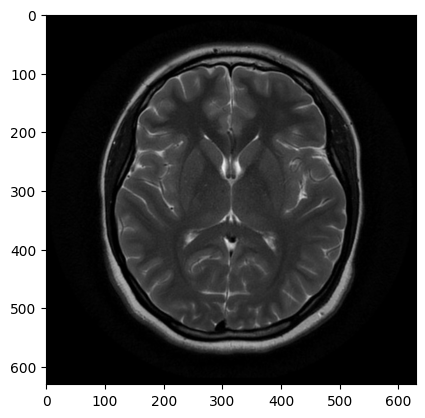

In [7]:
# Import the necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

# Step 2: Load the dataset
data_dir = 'drive/MyDrive/Brain MRI Images for Brain Tumor Detection/brain_tumor_dataset'

# Step 3: Display a sample image
sample_image = cv2.imread(os.path.join(data_dir, 'no', '1 no.jpeg'))
plt.imshow(sample_image)

<BarContainer object of 2 artists>

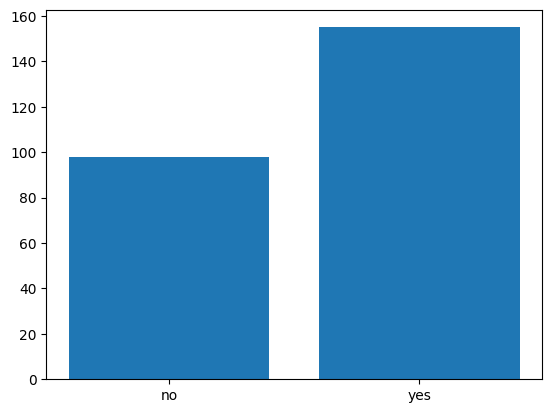

In [8]:
# Step 5: Check the distribution of the target variable
tumor_types = os.listdir(data_dir)
num_tumor = []
for tumor_type in tumor_types:
    num_tumor.append(len(os.listdir(os.path.join(data_dir, tumor_type))))
plt.bar(tumor_types, num_tumor)

In [9]:
import cv2
import os

data_dir = "drive/MyDrive/Brain MRI Images for Brain Tumor Detection/brain_tumor_dataset"

no_dir = os.path.join(data_dir, "no")
yes_dir = os.path.join(data_dir, "yes")

no_shapes = []
for image_path in os.listdir(no_dir):
    image = cv2.imread(os.path.join(no_dir, image_path))
    no_shapes.append(image.shape)

yes_shapes = []
for image_path in os.listdir(yes_dir):
    image = cv2.imread(os.path.join(yes_dir, image_path))
    yes_shapes.append(image.shape)

print(f"No images dimensions: {set(no_shapes)}")
print(f"Yes images dimensions: {set(yes_shapes)}")


No images dimensions: {(168, 300, 3), (264, 210, 3), (1080, 1920, 3), (444, 468, 3), (530, 380, 3), (213, 236, 3), (250, 201, 3), (442, 409, 3), (442, 442, 3), (442, 400, 3), (225, 225, 3), (301, 275, 3), (243, 207, 3), (222, 227, 3), (540, 504, 3), (454, 442, 3), (725, 728, 3), (248, 208, 3), (200, 200, 3), (197, 177, 3), (194, 259, 3), (417, 428, 3), (259, 194, 3), (340, 339, 3), (252, 200, 3), (630, 630, 3), (275, 220, 3), (614, 630, 3), (449, 359, 3), (750, 750, 3), (236, 214, 3), (262, 227, 3), (282, 230, 3), (442, 441, 3), (201, 173, 3), (244, 206, 3), (242, 208, 3), (512, 512, 3), (474, 356, 3), (680, 680, 3), (214, 235, 3), (1024, 1024, 3), (217, 232, 3), (664, 550, 3), (198, 150, 3), (361, 642, 3), (257, 196, 3), (183, 275, 3), (393, 350, 3), (238, 212, 3), (326, 276, 3), (338, 276, 3), (400, 393, 3), (251, 201, 3), (234, 215, 3), (200, 300, 3), (537, 472, 3), (280, 420, 3), (192, 192, 3), (231, 218, 3), (221, 228, 3)}
Yes images dimensions: {(355, 310, 3), (279, 258, 3), (349

In [10]:
import cv2
import os

data_dir = "drive/MyDrive/Brain MRI Images for Brain Tumor Detection/brain_tumor_dataset"
target_size = (224, 224)

# Define a function to preprocess and resize images
def preprocess_image(image_path, target_size):
    # Load the image
    image = cv2.imread(image_path)
    # Convert to grayscale
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Resize the image
    image = cv2.resize(image, target_size)
    # Normalize the pixel values to be between 0 and 1
    image = image / 255.0
    return image

# Create empty lists to store the preprocessed images and their labels
X = []
y = []

# Loop over the images in the "no" folder
for image_path in os.listdir(os.path.join(data_dir, "no")):
    # Preprocess and resize the image
    image = preprocess_image(os.path.join(data_dir, "no", image_path), target_size)
    # Add the image to the list of preprocessed images
    X.append(image)
    # Add the label "0" for "no tumor" to the list of labels
    y.append(0)

# Loop over the images in the "yes" folder
for image_path in os.listdir(os.path.join(data_dir, "yes")):
    # Preprocess and resize the image
    image = preprocess_image(os.path.join(data_dir, "yes", image_path), target_size)
    # Add the image to the list of preprocessed images
    X.append(image)
    # Add the label "1" for "tumor" to the list of labels
    y.append(1)

# Convert the lists to NumPy arrays
X = np.array(X)
y = np.array(y)

In [11]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Split the dataset into training, validation, and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [13]:
import os
import random
import shutil

data_dir = "drive/MyDrive/Brain MRI Images for Brain Tumor Detection/brain_tumor_dataset"
train_dir = "drive/MyDrive/Brain MRI Images for Brain Tumor Detection/train"
val_dir = "drive/MyDrive/Brain MRI Images for Brain Tumor Detection/val"
test_dir = "drive/MyDrive/Brain MRI Images for Brain Tumor Detection/test"

if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(val_dir):
    os.makedirs(val_dir)
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

for tumor_type in os.listdir(data_dir):
    tumor_dir = os.path.join(data_dir, tumor_type)
    train_tumor_dir = os.path.join(train_dir, tumor_type)
    val_tumor_dir = os.path.join(val_dir, tumor_type)
    test_tumor_dir = os.path.join(test_dir, tumor_type)
    if not os.path.exists(train_tumor_dir):
        os.makedirs(train_tumor_dir)
    if not os.path.exists(val_tumor_dir):
        os.makedirs(val_tumor_dir)
    if not os.path.exists(test_tumor_dir):
        os.makedirs(test_tumor_dir)
    image_paths = os.listdir(tumor_dir)
    random.shuffle(image_paths)
    num_train = int(len(image_paths) * 0.7)
    num_val = int(len(image_paths) * 0.15)
    num_test = len(image_paths) - num_train - num_val
    train_paths = image_paths[:num_train]
    val_paths = image_paths[num_train:num_train+num_val]
    test_paths = image_paths[num_train+num_val:]
    for path in train_paths:
        shutil.copy(os.path.join(tumor_dir, path), os.path.join(train_tumor_dir, path))
    for path in val_paths:
        shutil.copy(os.path.join(tumor_dir, path), os.path.join(val_tumor_dir, path))
    for path in test_paths:
        shutil.copy(os.path.join(tumor_dir, path), os.path.join(test_tumor_dir, path))


In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

# Define the input shape
input_shape = (224, 224, 3)

# Define the model architecture
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['accuracy'])

# Define the data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    'drive/MyDrive/Brain MRI Images for Brain Tumor Detection/brain_tumor_dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training')
validation_generator = train_datagen.flow_from_directory(
    'drive/MyDrive/Brain MRI Images for Brain Tumor Detection/brain_tumor_dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation')

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples/train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples/validation_generator.batch_size)

Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Epoch 1/10
6/6 [==============================] - 33s 6s/step - loss: 0.9048 - accuracy: 0.5123 - val_loss: 0.6339 - val_accuracy: 0.6200
Epoch 2/10
6/6 [==============================] - 31s 5s/step - loss: 0.7416 - accuracy: 0.6059 - val_loss: 0.6728 - val_accuracy: 0.7400
Epoch 3/10
6/6 [==============================] - 33s 5s/step - loss: 0.6199 - accuracy: 0.8079 - val_loss: 0.8365 - val_accuracy: 0.5600
Epoch 4/10
6/6 [==============================] - 30s 5s/step - loss: 0.5907 - accuracy: 0.7143 - val_loss: 0.5614 - val_accuracy: 0.7400
Epoch 5/10
6/6 [==============================] - 30s 5s/step - loss: 0.5307 - accuracy: 0.7833 - val_loss: 0.5464 - val_accuracy: 0.7400
Epoch 6/10
6/6 [==============================] - 30s 5s/step - loss: 0.4931 - accuracy: 0.7833 - val_loss: 0.5495 - val_accuracy: 0.7400
Epoch 7/10
6/6 [==============================] - 30s 5s/step - loss: 0.4800 - accuracy: 0.

In [15]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load the data and preprocess it
data_dir = "drive/MyDrive/Brain MRI Images for Brain Tumor Detection/brain_tumor_dataset"
categories = os.listdir(data_dir)
data = []
labels = []

for category in categories:
    path = os.path.join(data_dir, category)
    for img in os.listdir(path):
        try:
            image = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            resized_image = cv2.resize(image, (64, 64))
            data.append(resized_image.flatten())
            labels.append(category)
        except Exception as e:
            print("Error:", e)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Train the SVM classifier
classifier = SVC(kernel='linear', C=1, gamma='auto')
classifier.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8235294117647058
              precision    recall  f1-score   support

          no       1.00      0.55      0.71        20
         yes       0.78      1.00      0.87        31

    accuracy                           0.82        51
   macro avg       0.89      0.78      0.79        51
weighted avg       0.86      0.82      0.81        51



In [16]:
# Fine-tune the SVM classifier
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ('linear', 'rbf', 'poly'), 'C': [0.1, 1, 10]}
svc = SVC(gamma='auto')
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8235294117647058
              precision    recall  f1-score   support

          no       0.87      0.65      0.74        20
         yes       0.81      0.94      0.87        31

    accuracy                           0.82        51
   macro avg       0.84      0.79      0.80        51
weighted avg       0.83      0.82      0.82        51

